___
# <font color= #d4b1e6> **Proyecto 1: An√°lisis de Sentimientos** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Luc√≠a Beltr√°n, Priscila Cervantes Ram√≠rez & M√≥nica Ibarra Herrera` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Miner√≠a de Textos` </font>
___

A continuaci√≥n se trabajar√° con un dataset que contiene rese√±as de pel√≠culas que est√°n etiquetadas como positivas y negativas.

En este proyecto se implementar√°n y comparar√°n modelos basados en n-grams (unigramas, bigramas y trigramas) enfocados en la clasificaci√≥n de texto. El objetivo es evaluar c√≥mo los diferentes tama√±os de n-gramas influyen en el desempe√±o de los algoritmos que se emplear√°n. 

Los modelos que se incluir√°n son los siguientes:
- Regresi√≥n Log√≠stica 
- Naive Bayes
- SVM

Para cada uno de los modelos mencionados anteriormente se obtendr√°n diferentes m√©tricas como Accuracy, Precision, Recall y F1-Score.

Se har√°n evaluaciones y se determinar√° cu√°l fue el modelo con el mejor desempe√±o, as√≠ como se revisar√°n algunos errores que hicieron los modelos para identificar por qu√© predijo mal, ya sea porque la rese√±a era de sarcasmo, negaci√≥n, etc.

### <font color= #d4b1e6> **Librer√≠as a utilizar** </font>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import random

### <font color= #d4b1e6> **Importaci√≥n de los datos** </font>

In [21]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

*Visualizar que no haya valores nulos*

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### <font color= #d4b1e6> **Divisi√≥n train/test** </font>

In [23]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42, stratify=df['sentiment'])

print("Tama√±o train:", len(train_df))
print("Tama√±o test:", len(test_df))


Tama√±o train: 25000
Tama√±o test: 25000


Se usar√°n el 50% es decir 25,000 rese√±as para entrenar a los modelos y las rese√±as restantes, se usar√°n para probar su rendimiento.

### <font color= #d4b1e6> **Pre-Procesamiento** </font>

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Se utiliz√≥ la librer√≠a NLTK (Natural Language Toolkit) para realizar la tokenizaci√≥n del texto. Para ello fue necesario descargar los recursos *punkt*, *punkt_tab* y *stopwords*.

- *punkt* permite dividir de manera autom√°tica un texto en oraciones y palabras (tokens). 

- *punkt_tab* contiene informaci√≥n extra para que funcione de manera correcta el tokenizador.

- *stopwords* que contiene un listado de palabras muy frecuentes en el idioma (como the, is, and) que suelen eliminarse por no aportar valor al analizar texto.

De esta forma, se asegura que cada rese√±a se transforme en una secuencia de palabras significativas antes de construir representaciones con n-gramas.

*Limpieza de rese√±as*

In [25]:
STOPWORDS = set(stopwords.words("english"))
PUNCT_TABLE = str.maketrans("", "", string.punctuation)

- *STOPWORDS* importa una lista de stopwords en ingl√©s desde NLTK y las convierte en un conjunto para que las b√∫squedas sean m√°s r√°pidas cuando se filtre texto.
- *PUNCT_TABLE* crea una tabla de traducci√≥n que sirve para eliminar todos los signos de puntuaci√≥n, limpia el texto quitando las puntuaciones.

In [26]:
def preprocess_text(text, remove_stopwords=False):
    # Min√∫sculas
    text = text.lower()
    # Eliminar HTML
    text = re.sub(r"<.*?>", " ", text)
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar tokens que no son alfanum√©ricos
    tokens = [t for t in tokens if any(c.isalnum() for c in t)]
    # Eliminar stopwords si se requiere
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOPWORDS]
    return " ".join(tokens)

# Aplicamos a train y test
train_df["clean_review"] = train_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))
test_df["clean_review"] = test_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))

train_df.head()

review sentiment  \
3055   Trio's vignettes were insightful and quite enj...  positive   
47326  I had never heard of this one before the owner...  negative   
48869  This is an excellent but hard to find trippy W...  positive   
48623  I am a huge fan of big, loud, trashy, complete...  positive   
39657  Easily Lucio Fulci's most respected film, "Don...  positive   

                                            clean_review  
3055   trio 's vignettes were insightful and quite en...  
47326  i had never heard of this one before the owner...  
48869  this is an excellent but hard to find trippy w...  
48623  i am a huge fan of big loud trashy completely ...  
39657  easily lucio fulci 's most respected film do n...

Se implementa una funci√≥n de preprocesamiento de texto que:

1) Convierte todo a min√∫sculas.

2) Elimina etiquetas HTML.

3) Tokeniza las rese√±as en palabras individuales.

4) Filtra tokens que no son letras o n√∫meros como signos de puntuaci√≥n

5) Opcionalmente elimina stopwords.

Se decidi√≥ no eliminar las stopwords durante el preprocesamiento, ya que en an√°lisis de sentimientos estas palabras pueden cambiar el significado de una oraci√≥n. Palabras como ‚Äònot‚Äô, ‚Äònever‚Äô o ‚Äòdon‚Äôt‚Äô son esenciales para que el modelo identifique correctamente si la rese√±a es positiva o negativa. 

De esta manera, se obtiene una columna clean_review con texto m√°s limpio y normalizado, que facilita el posterior an√°lisis y entrenamiento del modelo de clasificaci√≥n.

*Extracci√≥n de caracter√≠sticas*

In [27]:
# Definir el vectorizador con unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=50000) # max_features: limita vocabulario para no explotar la RAM

#  Ajustar al train y transformar
X_train = vectorizer.fit_transform(train_df["clean_review"])
X_test = vectorizer.transform(test_df["clean_review"])

y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (25000, 50000)
Shape X_test: (25000, 50000)


Para representar las rese√±as se utiliz√≥ un CountVectorizer de Scikit-learn para extraer unigramas, bigramas y trigramas. Esto significa que cada rese√±a se transforma en un vector que refleja la frecuencia de palabras individuales y combinaciones de dos o tres palabras consecutivas. Se limit√≥ el vocabulario a 50,000 caracter√≠sticas para reducir el consumo de memoria.

El vectorizador se ajusta al conjunto de entrenamiento y luego se aplica al conjunto de prueba usando el mismo vocabulario aprendido, asegurando que la evaluaci√≥n sea consistente. Las etiquetas de sentimiento se almacenan por separado en y_train y y_test, y las dimensiones de las matrices resultantes reflejan el n√∫mero de rese√±as y la cantidad de n-gramas considerados.

### <font color= #d4b1e6> **Entrenamiento de Modelos** </font> 

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

In [28]:
logreg = LogisticRegression(max_iter=1000, solver="saga")
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*Explicaci√≥n de hiperpar√°metros*

Para entrenar el modelo de Regresi√≥n Log√≠stica se utiliz√≥ LogisticRegression de Scikit-learn con los hiperpar√°metros max_iter=1000 y solver="saga".

- *max_iter* de 1000 para asegurar que el algoritmo converja, dado el tama√±o y la alta dimensionalidad de los datos de n-grams.

- *solver="saga"* fue elegido por su eficiencia con matrices dispersas y por su capacidad de manejar regularizaci√≥n L1 y L2, caracter√≠sticas √∫tiles para textos con muchas caracter√≠sticas.

#### <font color= #96d9cf> **Naive Bayes** </font>

In [29]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Se entren√≥ un modelo Naive Bayes multinomial para clasificar las rese√±as en positivas o negativas. Este modelo es adecuado para datos de conteo, como los vectores de n-grams, ya que estima la probabilidad de cada palabra dado el sentimiento de la rese√±a.

#### <font color= #96d9cf> **SVM** </font>

In [30]:
svm = LinearSVC(C=0.001)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Se utiliz√≥ Support Vector Machine Lineal, adecuado para matrices dispersas de alta dimensionalidad como las obtenidas con n-grams. 

*Explicaci√≥n de hiperpar√°metros*:

- C: controla la regularizaci√≥n y penalizaci√≥n de errores.


### <font color= #d4b1e6> **Evaluaci√≥n** </font> 

In [31]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["positive", "negative"],
                yticklabels=["positive", "negative"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

In [32]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression
Accuracy: 0.90108
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90     12500
    positive       0.90      0.91      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



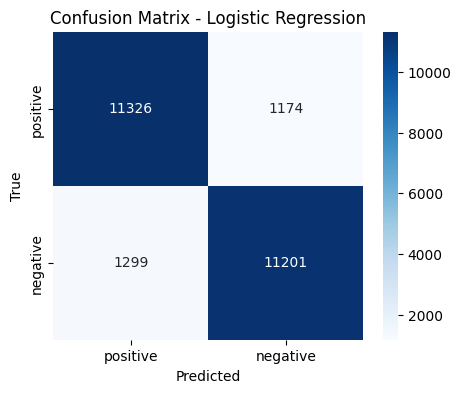

In [33]:
plot_confusion(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")

#### <font color= #96d9cf> **Naive Bayes** </font>

In [34]:
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.86692
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87     12500
    positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



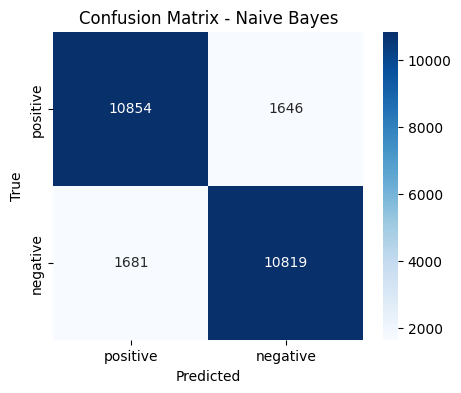

In [35]:
plot_confusion(y_test, y_pred_nb, "Confusion Matrix - Naive Bayes")


#### <font color= #96d9cf> **SVM** </font>

In [36]:
print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM
Accuracy: 0.8978
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90     12500
    positive       0.89      0.91      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



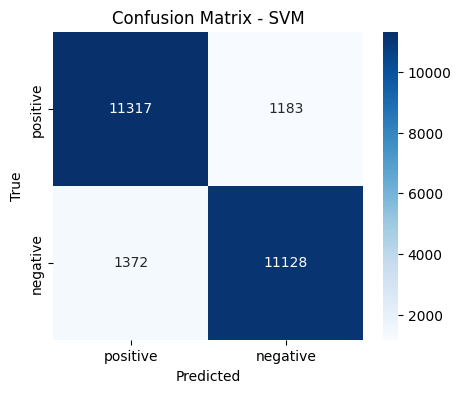

In [37]:
plot_confusion(y_test, y_pred_svm, "Confusion Matrix - SVM")

### <font color= #d4b1e6> **Comparaci√≥n de resultados** </font> 

| Modelo | Accuracy | F1-Score | Precision | Recall |
|------------|-------|-------|------|--------|
| Regresi√≥n log√≠stica|0.901|0.9|0.9| 0.9| 
| Naive Bayes|0.866|0.87|0.87|0.87|    
| SVM|0.8651|0.897|0.9|0.9|0.9|

### <font color= #d4b1e6> **An√°lisis de Error** </font> 

In [38]:
# Escogemos un modelo para analizar (ej. Logistic Regression)
y_pred = y_pred_logreg  

# Encuentra √≠ndices de errores
errores_idx = [i for i, (y_true, y_hat) in enumerate(zip(y_test, y_pred)) if y_true != y_hat]

print("Total errores:", len(errores_idx))

# Muestra algunos ejemplos al azar usando el texto original
for i in random.sample(errores_idx, 5):
    print("="*80)
    print("üîπ Review original:")
    print(test_df.iloc[i]["review"])   # aqu√≠ usamos test_df, no X_test
    print("Sentiment real:", test_df.iloc[i]["sentiment"])
    print("Predicci√≥n modelo:", y_pred[i])

Total errores: 2473
üîπ Review original:
This is a really well made movie. Sumitra Bhave has always made sensible cinema and this is my favourite film by her. This movie should have won the National Award and would have been my pick to represent India at the Oscars. It is at least a thousand times better than 'Shaaws', which is going to the Oscars, from India, this year.<br /><br />It is such a pity that the information about this (and all other Indian movies) on IMDb is lacking and sometimes even wrong. Sadashiv Amrapurkar played a very important character in this movie and he is not even credited on these pages. The rest of the cast and crew too are not mentioned at all. Awards and nominations for this movie are not given even when Sonali Kulkarni won the Indian National Award for this movie. There was not even a single vote cast for 'Doghi'.<br /><br />'Doghi' is not a Hindi movie. It is Marathi, and thankfully escapes the song and dance sequence, does not get tangled up in glitzy 

### Conclusiones 
---
Al final el modelo que arrojo mejores metricas fue la regresion logistica dandonos .901 de accuracy,0.9 de F1-score, 0.9 de precision y 0.9 de recall. Superando a los demas modelos por aproximadamente 0.04.

Los errores en la prediccion se daban gracias a que le daba peso a las palabras negativas dentro de rese√±as positivas, aunque solo se usen para describir escenas, personajes o incluso a la misma aplicaci√≥n. Otro error, que va de la mano con el anterior, es que se deja guiar por las primeras palabras que hay en la rese√±a, por esto si una rese√±a empieza diciendo lo bueno para acabar diciendo que es la pero pelicula, el modelo no lo terminara de entender. Tambi√©n nos percatamos que cuando en una rese√±a existe ironia no logra comprenderla, asi como no distingue sentimientos hacia la pelicula con los elementos externos. En pocas palabras, el modelo analizaba superficialmente el texto en vez de comprender la intenci√≥n completa del autor.